In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [26]:
covid=pd.read_csv('who_covid19.csv')
covid

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
1,United States of America,Americas,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
2,India,South-East Asia,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
3,Brazil,Americas,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
4,Russian Federation,Europe,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0


In [27]:
covid.shape

(238, 12)

In [28]:
covid.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [29]:
covid.dtypes

Name                                                             object
WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
dtype: object

In [30]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

FIRST TO REMOVE MISSING VALUES

In [31]:
missingData=covid.isnull().sum()
missingData
#since the missing data is very little compared to the whole data set, it can be 
#randomly filled in such that the data set is complete.

Name                                                            0
WHO Region                                                      1
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  1
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     1
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 1
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    1
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [32]:
#how to remove or ignore the missing data

In [33]:
covid.set_index('Name',inplace=True)

In [34]:
covid

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,,
Global,NaN,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
United States of America,Americas,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
India,South-East Asia,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
Brazil,Americas,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
Russian Federation,Europe,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794
...,...,...,...,...,...,...,...,...,...,...,...
Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0


<Axes: >

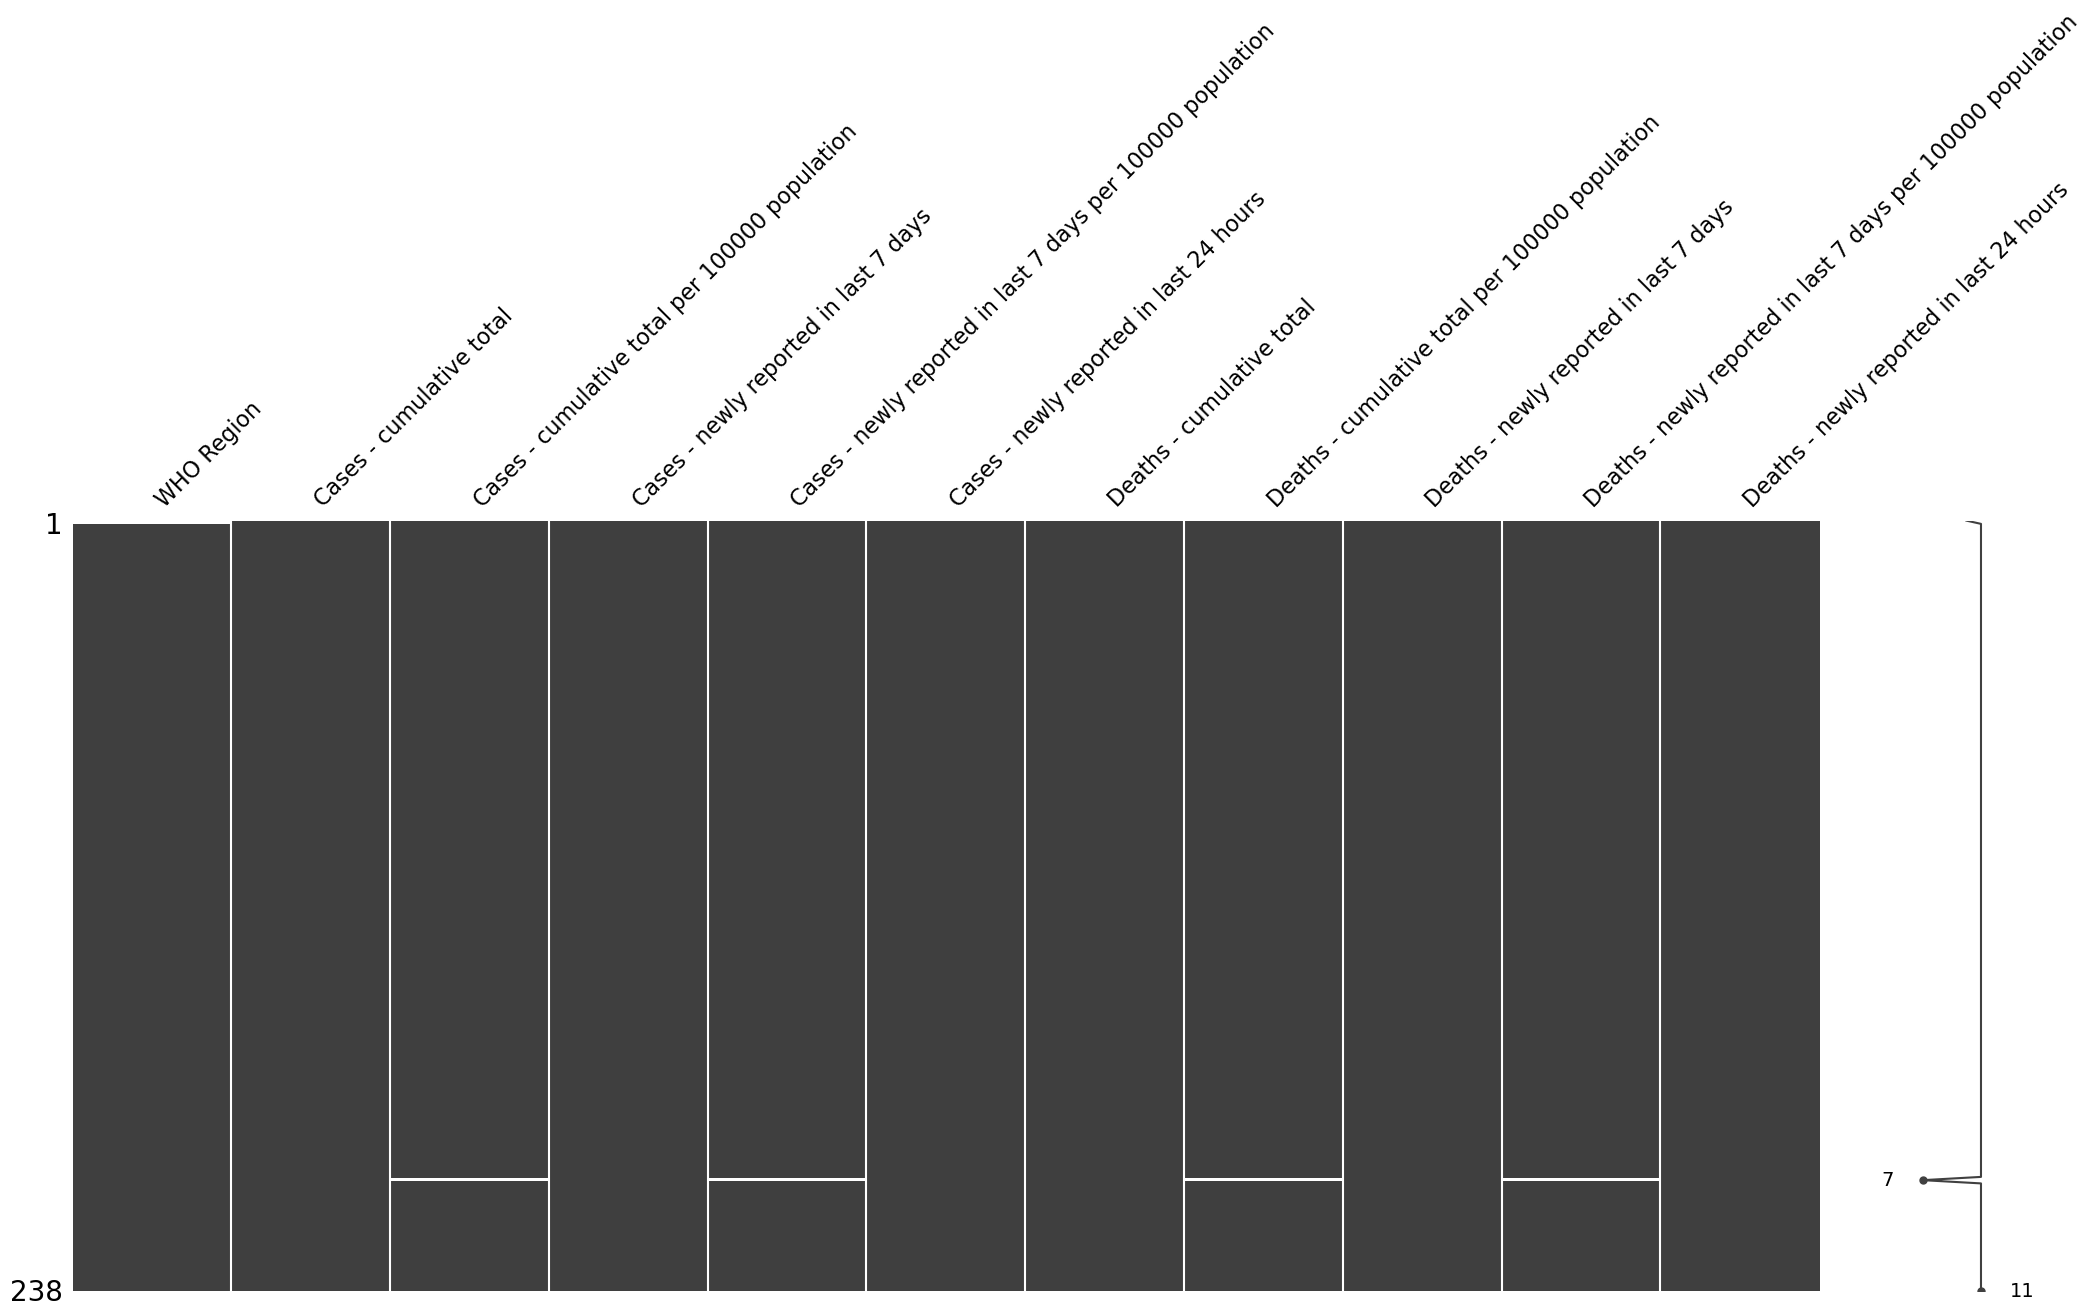

In [35]:
msno.matrix(covid)

REMOVING USING IMPUTATION (mean and mode and median)

TO FIND AND REMOVE OUTLIERS

In [36]:
continuous_Data=covid.select_dtypes(exclude='object')
continuous_Data

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,
Global,196553009,2521.675429,3999924,51.316996,623707,4200412,53.889156,63159,0.810298,10353
United States of America,34564448,10442.350000,471734,142.520000,90660,607095,183.410000,2155,0.650000,409
India,31572344,2287.840000,279282,20.240000,44230,423217,30.670000,3747,0.270000,555
Brazil,19797086,9313.670000,323132,152.020000,48013,553179,260.250000,7575,3.560000,1344
Russian Federation,6242066,4277.310000,163544,112.070000,23564,157771,108.110000,5475,3.750000,794
...,...,...,...,...,...,...,...,...,...,...
Saint Helena,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
Tokelau,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
Tonga,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0


In [37]:
discreteData=covid.select_dtypes(include='object')
discreteData

,WHO Region
Name,
Global,NaN
United States of America,Americas
India,South-East Asia
Brazil,Americas
Russian Federation,Europe
...,...
Saint Helena,Africa
Tokelau,Western Pacific
Tonga,Western Pacific


ValueError: num must be an integer with 1 <= num <= 9, not 10

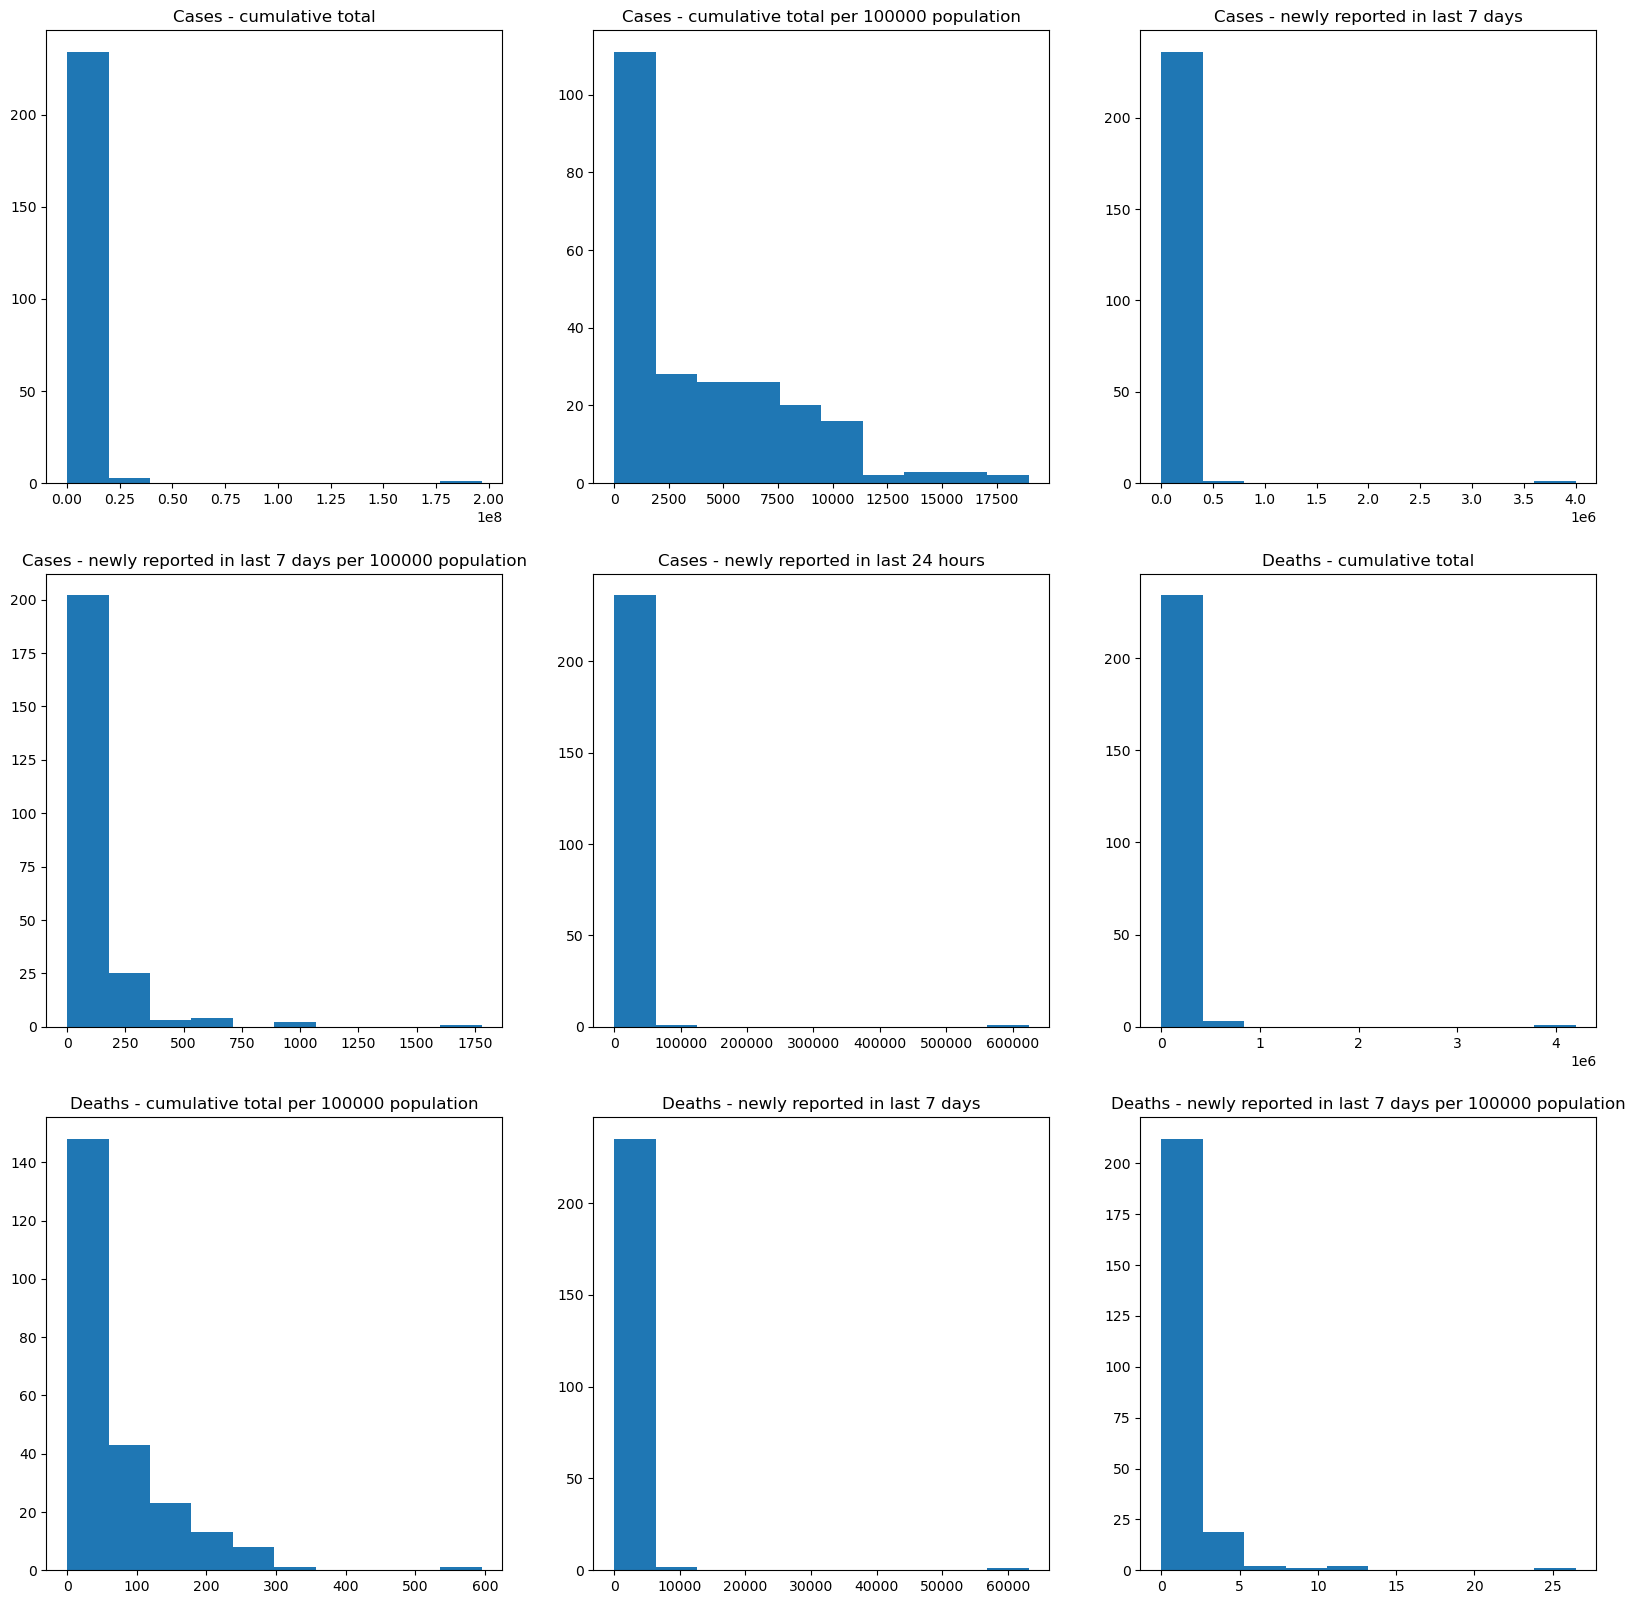

In [38]:
##VISUALISATION OF CONTINUOUS PLOTS
plt.figure(figsize=(20,20))
for i, col in enumerate(continuous_Data.columns):
    plt.subplot(3,3,i+1)
    plt.hist(covid[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#for skewed data
covid["Cases - cumulative total per 100000 population"]=covid["Cases - cumulative total per 100000 population"].fillna(covid["Cases - cumulative total per 100000 population"].median())
covid["Cases - newly reported in last 7 days per 100000 population"]=covid["Cases - newly reported in last 7 days per 100000 population"].fillna(covid["Cases - newly reported in last 7 days per 100000 population"].median())
covid["Deaths - cumulative total per 100000 population"]=covid["Deaths - cumulative total per 100000 population"].fillna(covid["Deaths - cumulative total per 100000 population"].median())
covid["Deaths - newly reported in last 7 days per 100000 population"]=covid["Deaths - newly reported in last 7 days per 100000 population"].fillna(covid["Deaths - newly reported in last 7 days per 100000 population"].median())
#for normalized data
#covid['depth']=covid['depth'].fillna(covid['depth'].mean())

In [ ]:
covid["WHO Region"]=covid["WHO Region"].fillna(covid["WHO Region"].mode()[0])

In [ ]:
missingData=covid.isnull().sum()
missingData

WHO Region                                                      0
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

TO REMOVE OUTLIERS

ValueError: num must be an integer with 1 <= num <= 9, not 10

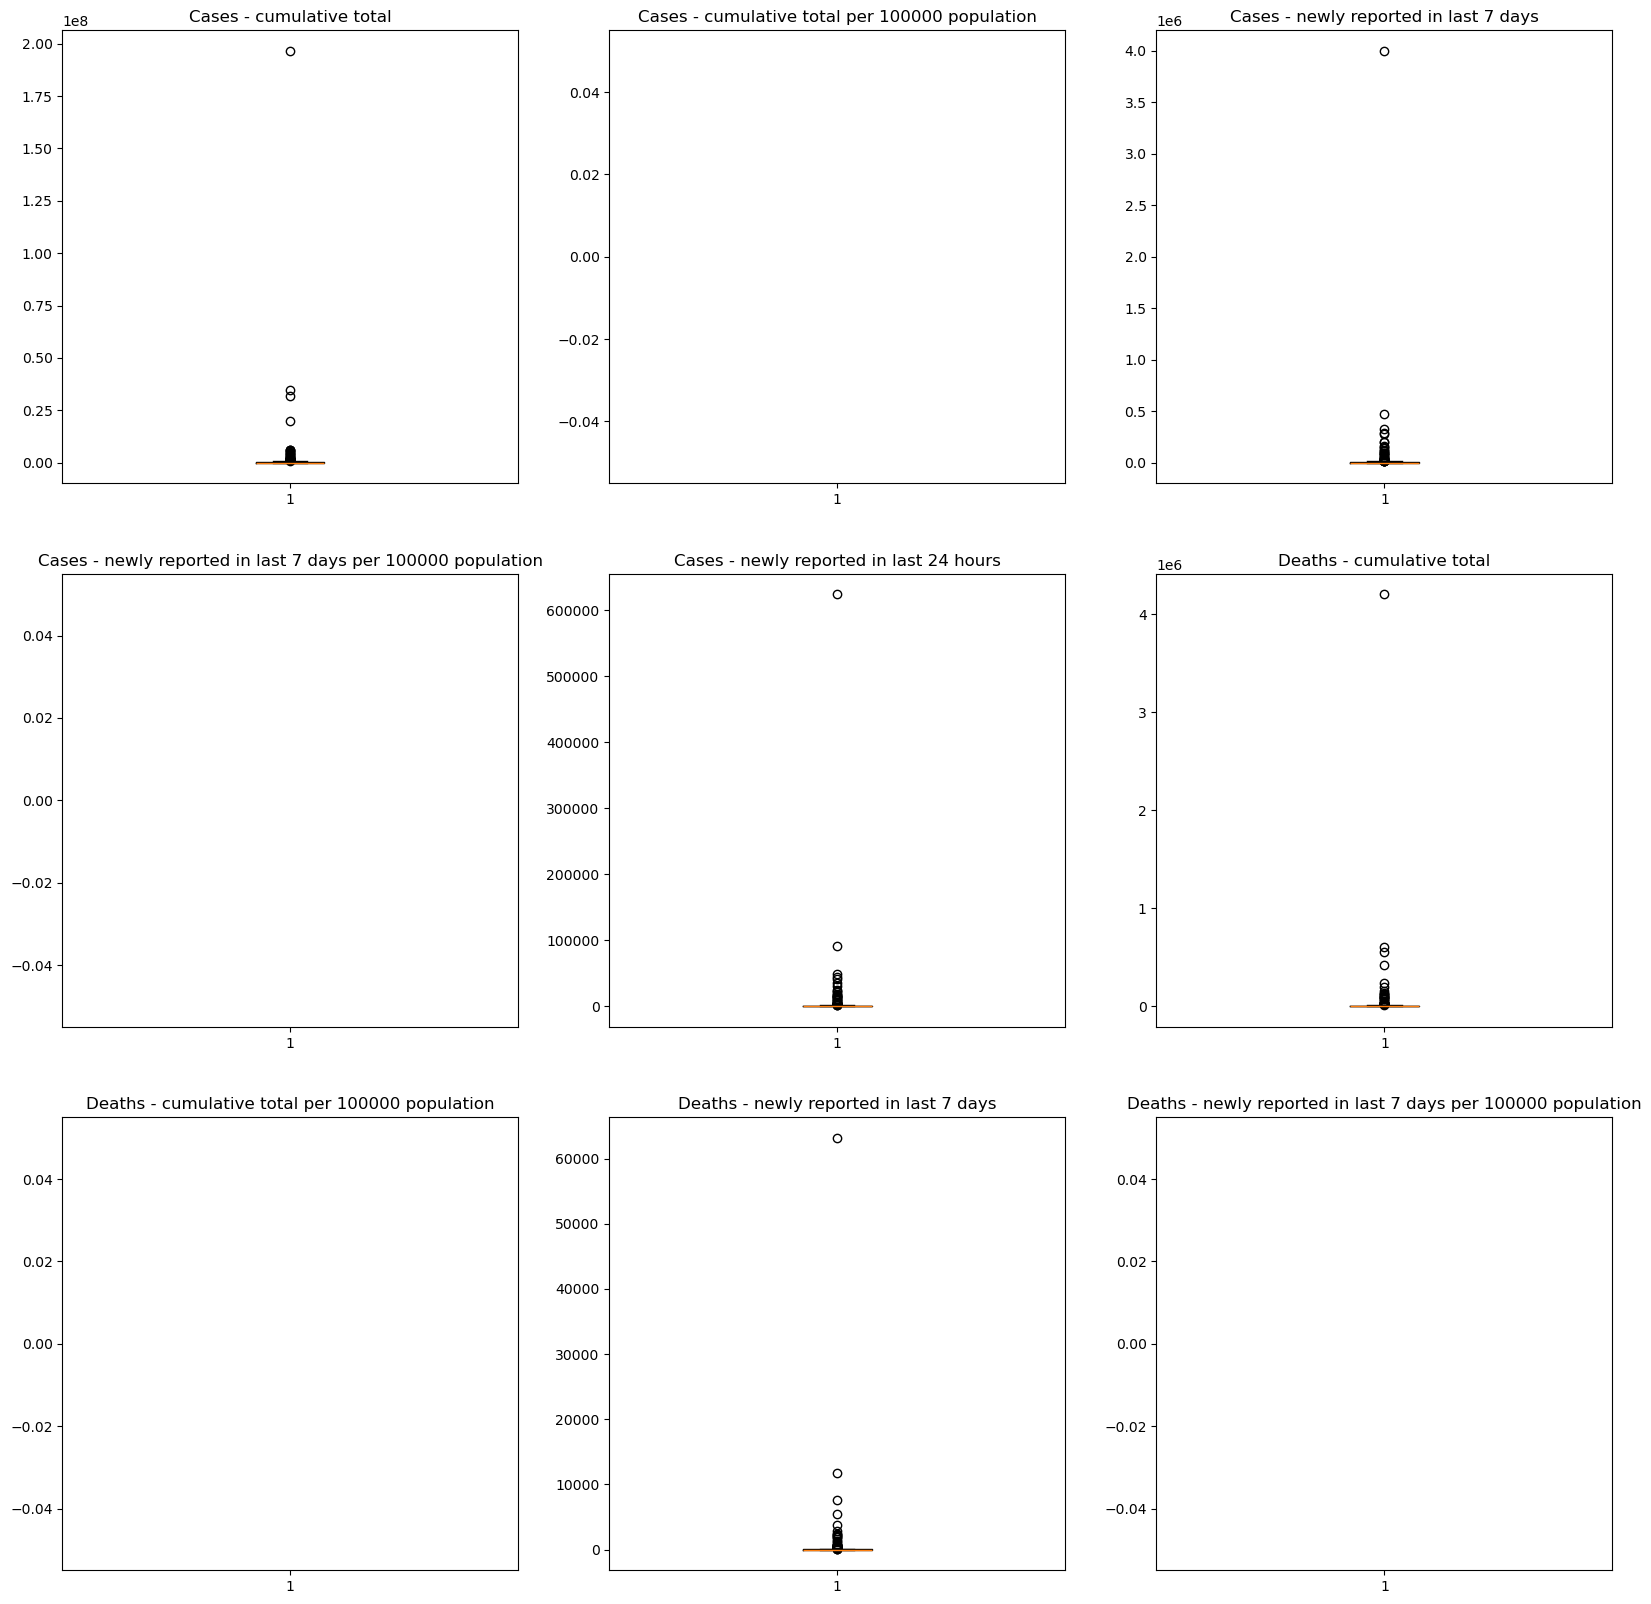

In [39]:
plt.figure(figsize=(20,20))
for i, col in enumerate(continuous_Data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(covid[col])
    plt.title(col)
plt.tight_layout()
plt.show()


REMOVING OUTLIERS USING IQR

In [40]:
#using IQR
def removing_outliers(columns):
    for i in columns:
        lower_quantile=covid[i].quantile(.25)
        upper_quantile=covid[i].quantile(.75)

        IQR=upper_quantile-lower_quantile

        upper_boundary=upper_quantile+1.5*IQR
        lower_boundary=lower_quantile-1.5*IQR

        covid[i]=np.where(covid[i]>upper_boundary,upper_boundary,covid[i])
        covid[i]=np.where(covid[i]<lower_boundary,lower_boundary,covid[i])

In [41]:
removing_outliers(continuous_Data)

In [42]:
def boxplotting(continuous_Data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(continuous_Data.columns):
        plt.subplot(3,3,i+1)
        plt.boxplot(covid[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

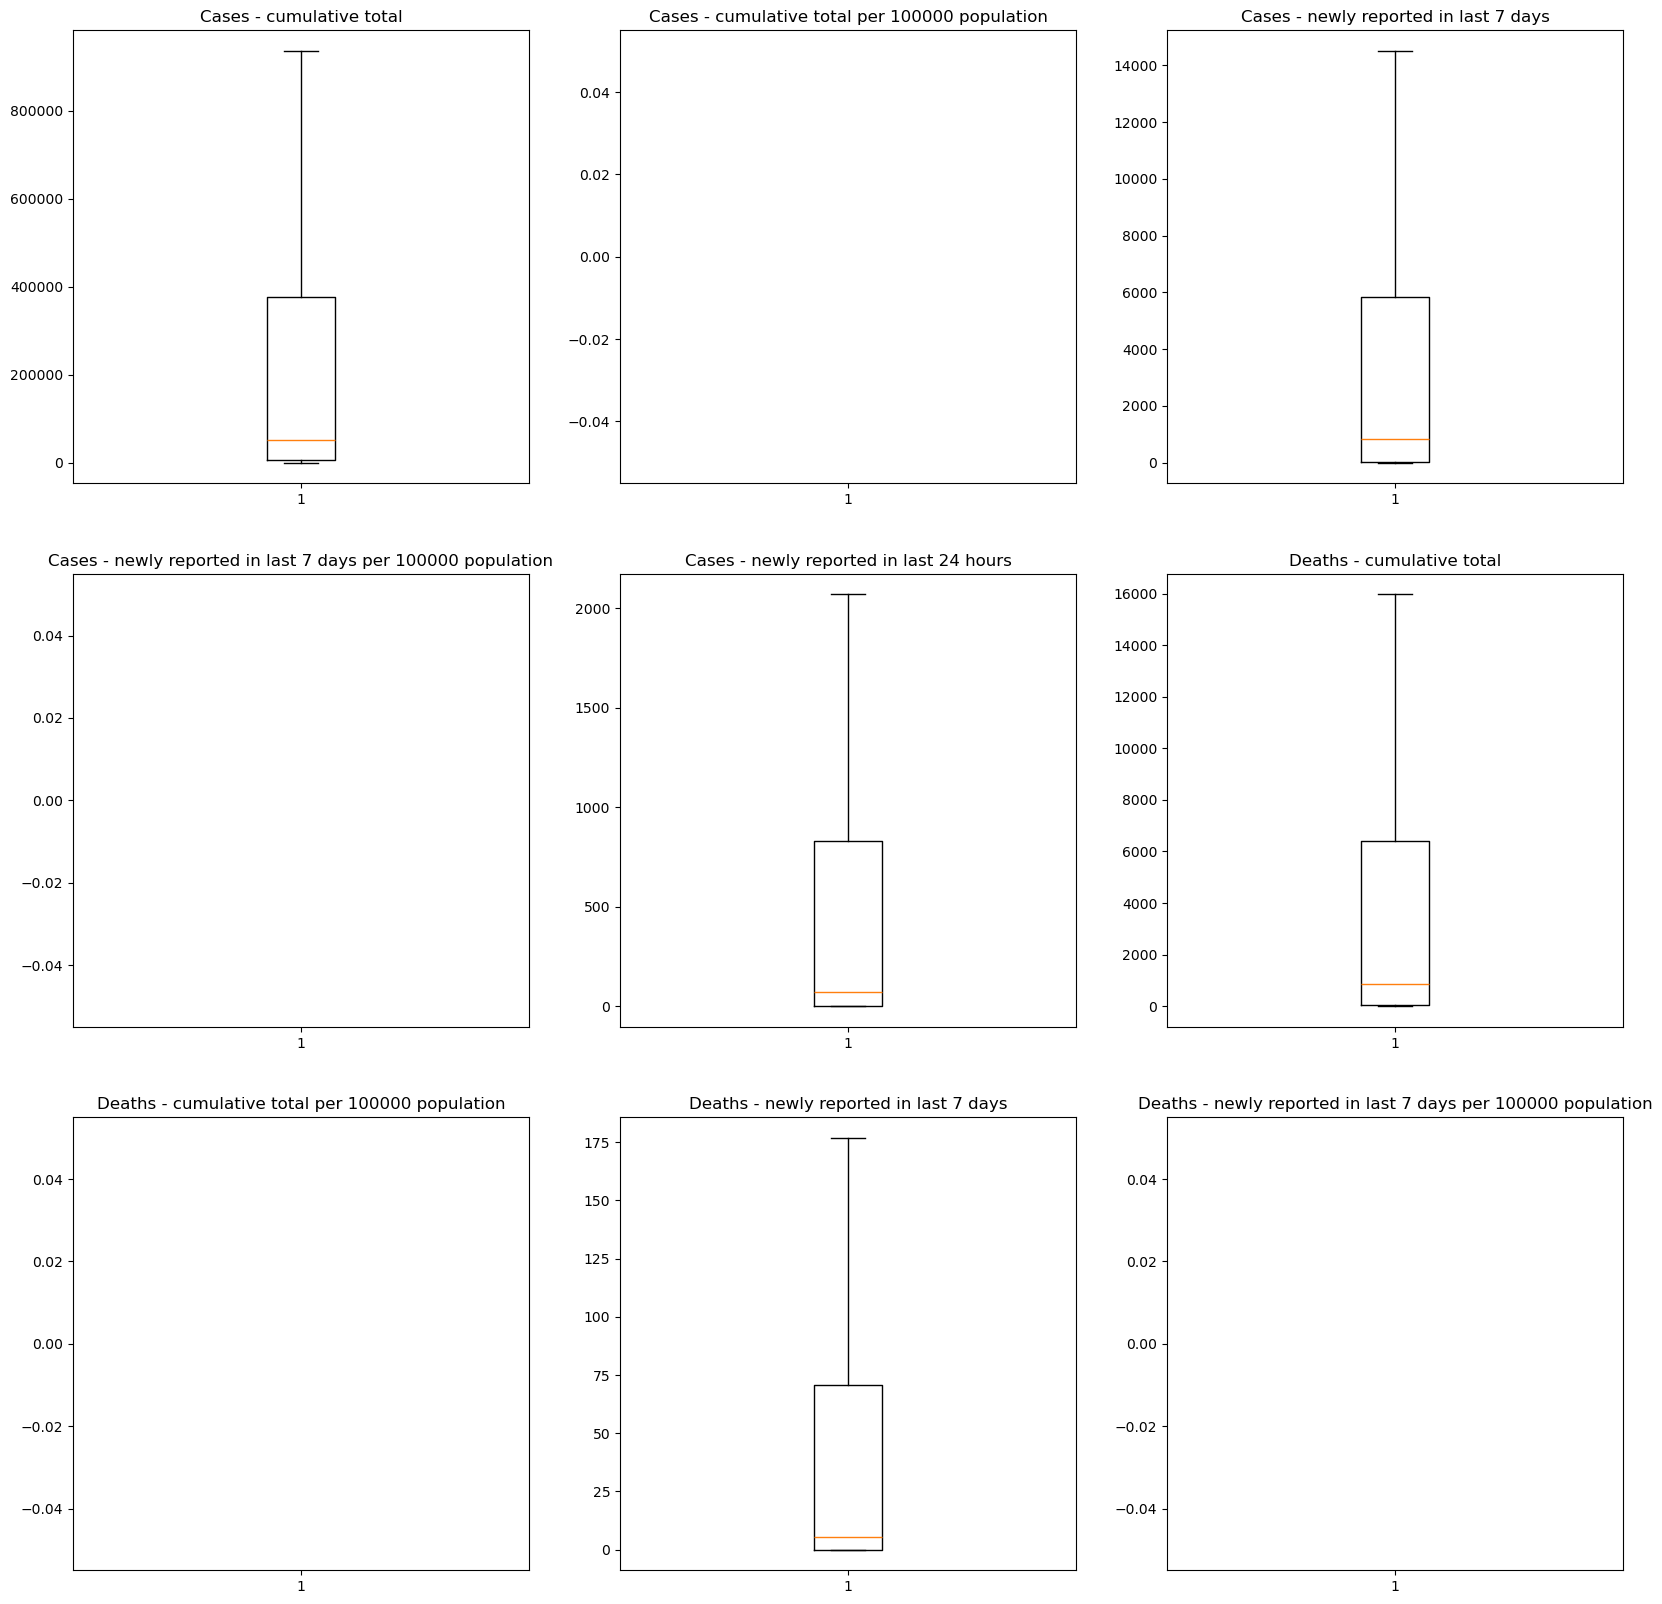

In [44]:
boxplotting(continuous_Data)

RELATIONSHIPS

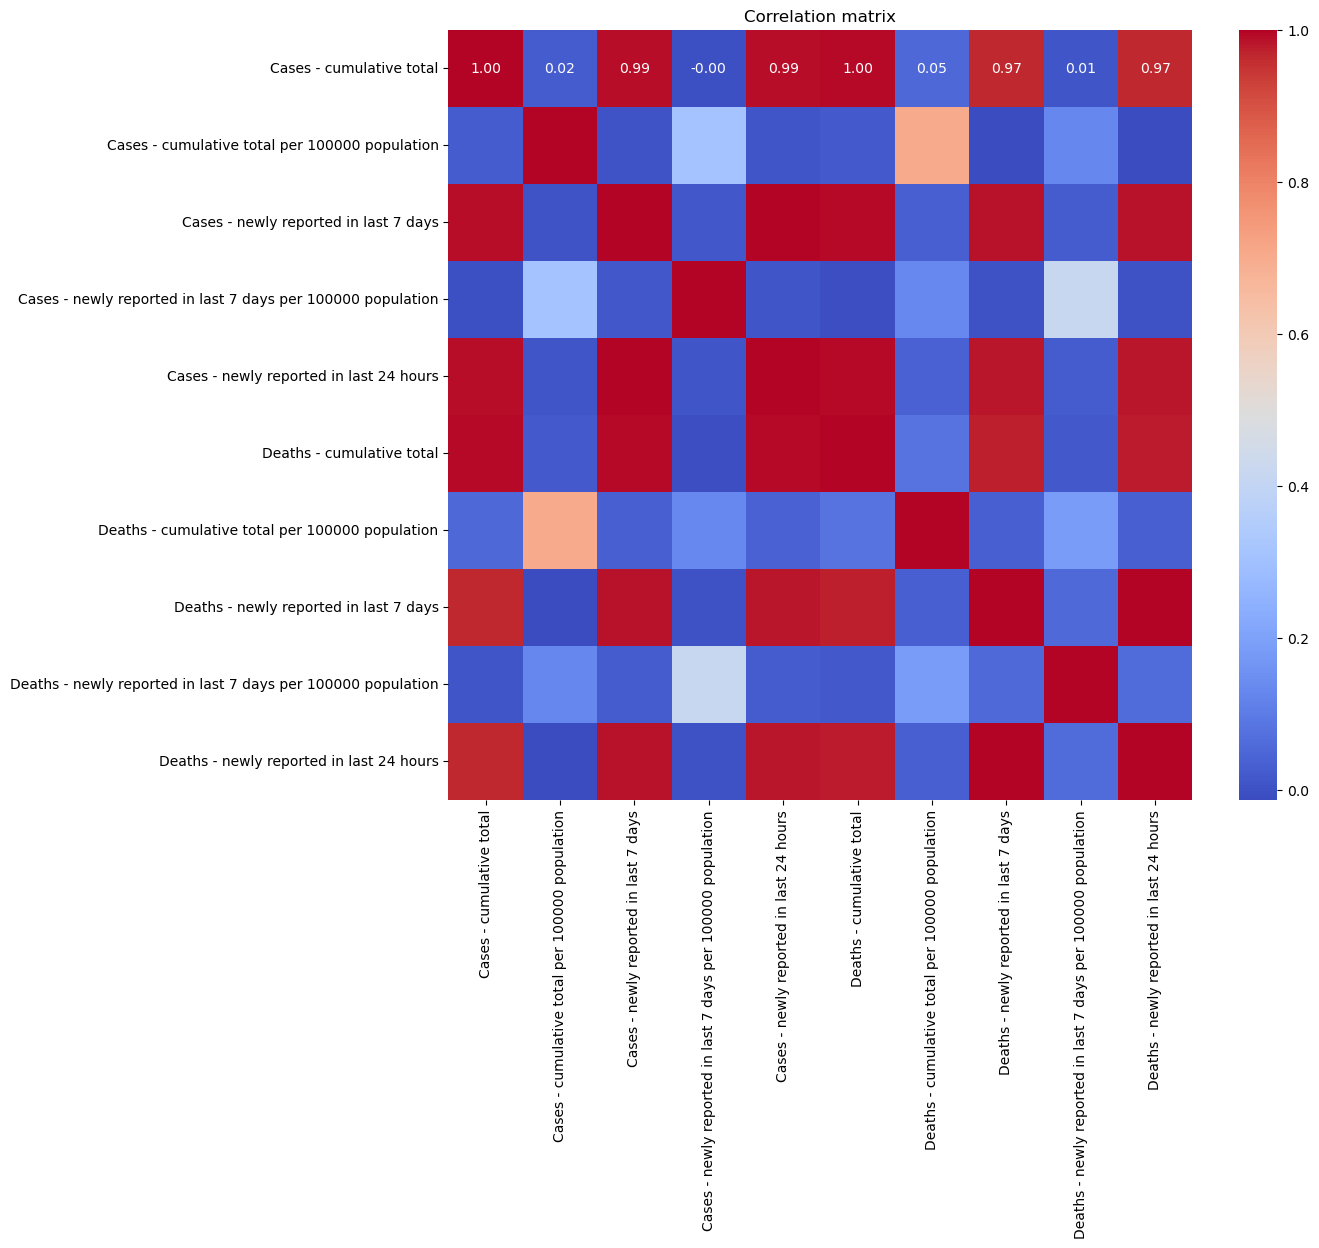

In [46]:
##CONTINUOUS TO CONTINUOUS
#Using a correlation matrix
corr_matrix=continuous_Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [ ]:
sns.scatterplot(covid,x="Cases-cumulative total",y="Deaths-cumulative total")

In [ ]:
plt.scatter(covid,x="Cases-cumulative total",y="Deaths-cumulative total")